In [1]:
import librenderman as rm

# Important settings. These are good general ones.
sampleRate = 44100
bufferSize = 512
fftSize = 512

# This will host a VST. It will render the features and audio we need.
engine = rm.RenderEngine(sampleRate, bufferSize, fftSize)

# Load the VST into the RenderEngine.
path = "/Library/Audio/Plug-Ins/VST/Serum.vst"
# path = '/Library/Audio/Presets/Xfer Records/Serum Presets/Presets/User/test_preset.fxp'

engine.load_plugin(path)
generator = rm.PatchGenerator(engine)

print(engine.get_plugin_parameters_description())

  0: MasterVol
  1: A Vol
  2: A Pan
  3: A Octave
  4: A Semi
  5: A Fine
  6: A Unison
  7: A UniDet
  8: A UniBlend
  9: A Warp
 10: A CoarsePit
 11: A WTPos
 12: A RandPhase
 13: A Phase
 14: B Vol
 15: B Pan
 16: B Octave
 17: B Semi
 18: B Fine
 19: B Unison
 20: B UniDet
 21: B UniBlend
 22: B Warp
 23: B CoarsePit
 24: B WTPos
 25: B RandPhase
 26: B Phase
 27: Noise Level
 28: Noise Pitch
 29: Noise Fine
 30: Noise Pan
 31: Noise RandPhase
 32: Noise Phase
 33: Sub Osc Level
 34: Sub Osc Pan
 35: Env1 Atk
 36: Env1 Hold
 37: Env1 Dec
 38: Env1 Sus
 39: Env1 Rel
 40: OscA>Fil
 41: OscB>Fil
 42: OscN>Fil
 43: OscS>Fil
 44: Fil Type
 45: Fil Cutoff
 46: Fil Reso
 47: Fil Driv
 48: Fil Var
 49: Fil Mix
 50: Fil Stereo
 51: Env2 Atk
 52: Env2 Hld
 53: Env2 Dec
 54: Env2 Sus
 55: Env2 Rel
 56: Env3 Atk
 57: Env3 Hld
 58: Env3 Dec
 59: Env3 Sus
 60: Env3 Rel
 61: LFO1 Rate
 62: LFO2 Rate
 63: LFO3 Rate
 64: LFO4 Rate
 65: PortTime
 66: PortCurve
 67: Chaos1 BPM
 68: Chaos2 BPM
 69: C

In [2]:
# Get a random patch and set it.
new_patch = generator.get_random_patch()
engine.set_patch(new_patch)

In [7]:
# Settings to play a note and extract data from the synth.
midiNote = 40
midiVelocity = 127
noteLength = 4.0
renderLength = 5.0

# Render the data. 
engine.render_patch(midiNote, midiVelocity, noteLength, renderLength)

audio = engine.get_audio_frames()

patch = engine.get_patch()

for parameter in patch:
    # Unpack and print the parameter tuple.
    index, value = parameter
    print("Index: " + '{:3d}'.format(index) + " --- Value: " + str(value))

Index:   0 --- Value: 0.8159173130989075
Index:   1 --- Value: 0.39795058965682983
Index:   2 --- Value: 0.9291599988937378
Index:   3 --- Value: 0.7847095131874084
Index:   4 --- Value: 0.7682043313980103
Index:   5 --- Value: 0.6202359795570374
Index:   6 --- Value: 0.9621216058731079
Index:   7 --- Value: 0.1587066501379013
Index:   8 --- Value: 0.7065491080284119
Index:   9 --- Value: 0.08664517104625702
Index:  10 --- Value: 0.13788016140460968
Index:  11 --- Value: 0.5653309226036072
Index:  12 --- Value: 0.9414144158363342
Index:  13 --- Value: 0.8891146183013916
Index:  14 --- Value: 0.8524479269981384
Index:  15 --- Value: 0.4986327886581421
Index:  16 --- Value: 0.4048856794834137
Index:  17 --- Value: 0.7192097306251526
Index:  18 --- Value: 0.5846856832504272
Index:  19 --- Value: 0.23607496917247772
Index:  20 --- Value: 0.3616862893104553
Index:  21 --- Value: 0.3349166512489319
Index:  22 --- Value: 0.5056650042533875
Index:  23 --- Value: 0.5620816349983215
Index:  24 -

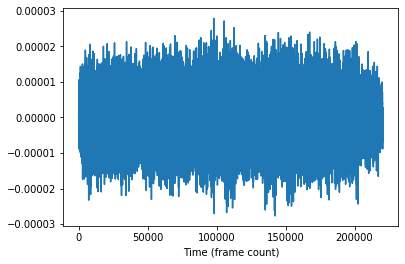

In [8]:
import matplotlib.pyplot as plt

plt.plot(audio)
plt.xlabel('Time (frame count)')
plt.show()

In [9]:
from IPython.display import Audio

Audio(audio, rate=sampleRate)